# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1,1))
y = np.array([5, 20, 14, 32, 22, 38])

In [3]:
model = LinearRegression().fit(x,y)

In [4]:
r_sq = model.score(x,y)
print('coefficient of determination : ', r_sq)

coefficient of determination :  0.715875613747954


In [5]:
print('intercept : ', model.intercept_)
print('slope : ', model.coef_)

intercept :  5.633333333333329
slope :  [0.54]


In [6]:
new_model = LinearRegression().fit(x, y.reshape((-1,1)))
print('intercept: ', new_model.intercept_)
print('slope: ', new_model.coef_)

intercept:  [5.63333333]
slope:  [[0.54]]


In [8]:
y_pred = model.predict(x)
print('predicted response: ', y_pred, sep='\n')

predicted response: 
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


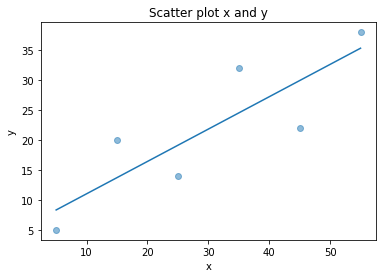

In [9]:
plt.scatter(x,y, alpha=0.5)
plt.plot(x,y_pred)

plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Polynomial Regression With scikit-learn

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [11]:
x = [[0,1], [5,1], [15,2], [25,5], [35,11], [45,15],
    [55,34], [60,35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]

x, y = np.array(x), np.array(y)

x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

model = LinearRegression().fit(x_, y)

r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

y_pred = model.predict(x_)

In [12]:
print('coefficient of determination: ', r_sq)
print('intercept: ', intercept)
print('coefficients: ', coefficients, sep='\n')
print('predicted response: ', y_pred, sep='\n')

coefficient of determination:  0.9453701449127822
intercept:  0.8430556452395734
coefficients: 
[ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]
predicted response: 
[ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


## Linear Regression on Real Dataset

## using Statsmodels

In [14]:
import statsmodels.api as sm
from sklearn import datasets

data = datasets.load_boston()

In [15]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=['MEDV'])

In [17]:
x = df['RM']
y = target['MEDV']

model =sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):                   3.74e-256
Time:                        14:20:47   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## using SKlearn

In [20]:
from sklearn import linear_model, datasets

data = datasets.load_boston()

df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=['MEDV'])

In [21]:
x = df
y = target['MEDV']

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = 